### Dataset
```
The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:
Dataset link: Walmart_data.csv

User_ID:	User ID
Product_ID:	Product ID
Gender:	Sex of User
Age:	Age in bins
Occupation:	Occupation(Masked)
City_Category:	Category of the City (A,B,C)
StayInCurrentCityYears:	Number of years stay in current city
Marital_Status:	Marital Status
ProductCategory:	Product Category (Masked)
Purchase:	Purchase Amount
```

### About Walmart

- Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

### Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

### Hints
 data exploration steps like:
Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.
Inference after computing the average female and male expenses.
Use the sample average to find out an interval within which the population average will lie. Using the sample of female customers you will calculate the interval within which the average spending of 50 million male and female customers may lie.
Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.
The interval that you calculated is called Confidence Interval. The width of the interval is mostly decided by the business: Typically 90%, 95%, or 99%. Play around with the width parameter and report the observations.
Conclude the results and check if the confidence intervals of average male and female spends are overlapping or not overlapping. How can Walmart leverage this conclusion to make changes or improvements?
Perform the same activity for Married vs Unmarried and Age
For Age, you can try bins based on life stages: 0-17, 18-25, 26-35, 36-50, 51+ years.
Give recommendations and action items to Walmart.

In [2]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
df = pd.read_csv('walmart_data.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [5]:
## data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


### obervation 

#### Data set have integer and object datatype
- Data set is clear, no null data points are there

### Finding correlation

In [7]:
data = df.corr()

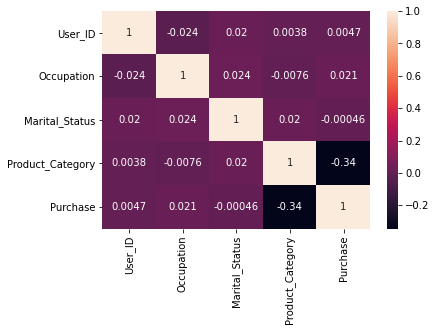

In [9]:
sns.heatmap(data, annot = True )
plt.show()

### Oberservation 
- Correlation is very less

### checking the purchase column using box-plot

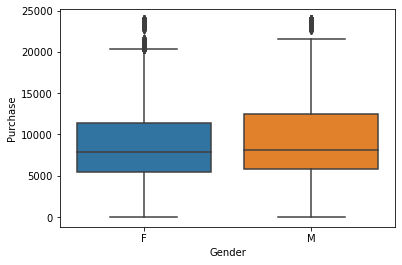

In [11]:
sns.boxplot(data = df, x = df['Gender'], y = df['Purchase'])
plt.show()

In [15]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

### Obervation
- box plot is showing that the purchase columns median of female is slighlty low than male.

In [25]:
df.groupby(['Gender'])['Purchase'].mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

#### Observation 
- Average purchase done by female is 8734.565765
- Average purchase done by Male is 9437.526040

### Density estimation of Purchase 

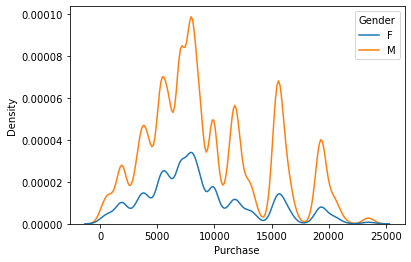

In [33]:
sns.kdeplot(x = df['Purchase'], hue = df['Gender'])
plt.show()

### Central Limit Theorem

### 95% C.I on 99th percentile value for travel_time via bootsrapping

In [35]:
df.head(4)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057


In [37]:
df['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00063642       1
P00077242       1
P00315242       1
P00339142       1
P00287042       1
Name: Product_ID, Length: 3631, dtype: int64

In [38]:
df['User_ID'].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1005391       7
1002690       7
1002111       7
1005608       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [41]:
(df['Product_ID'] == 'P00265242').value_counts()

False    548188
True       1880
Name: Product_ID, dtype: int64

In [44]:
((df['Product_ID'] == 'P00265242') & (df['Gender'] == 'F')).value_counts()

False    549560
True        508
dtype: int64

In [45]:
((df['Product_ID'] == 'P00265242') & (df['Gender'] == 'M')).value_counts()

False    548696
True       1372
dtype: int64

#### Confidence interval of purchase having product id = P00265242 and Gender = 'Male'

In [48]:
#Let's create r=1000 bootstrap samples, and let each bootstrap sample be of size=1000
r = 1000
data = df[(df['Product_ID'] == 'P00265242') & (df['Gender'] == 'M')]['Purchase']
size = 1000
bs_99p = np.empty(r)

for i in range(r):
    bs_sample = np.random.choice(data, size=size)
    bs_99p[i] = np.percentile(bs_sample,99)

In [49]:
len(bs_99p)

1000

In [50]:
bs_99p

array([8903.  , 8905.  , 8899.01, 8901.01, 8903.  , 8904.01, 8905.  ,
       8900.01, 8903.01, 8903.01, 8903.  , 8903.  , 8903.01, 8901.  ,
       8900.  , 8903.  , 8901.  , 8903.01, 8904.  , 8897.02, 8900.  ,
       8900.01, 8902.01, 8903.  , 8904.  , 8901.01, 8902.01, 8904.  ,
       8901.01, 8900.01, 8904.01, 8901.02, 8903.  , 8900.  , 8901.02,
       8902.01, 8903.  , 8904.  , 8901.  , 8904.  , 8904.01, 8905.  ,
       8898.01, 8905.  , 8905.  , 8901.01, 8904.  , 8900.  , 8900.  ,
       8901.  , 8903.  , 8901.  , 8900.  , 8902.01, 8901.  , 8903.  ,
       8902.01, 8898.02, 8904.01, 8903.  , 8902.  , 8901.  , 8898.  ,
       8904.01, 8903.  , 8901.  , 8901.  , 8902.  , 8903.  , 8900.01,
       8902.01, 8901.  , 8904.01, 8904.  , 8901.  , 8904.  , 8904.  ,
       8903.  , 8902.  , 8901.  , 8902.01, 8903.01, 8901.01, 8903.  ,
       8904.  , 8902.01, 8900.01, 8903.01, 8903.  , 8902.01, 8905.  ,
       8901.  , 8903.01, 8904.01, 8901.  , 8902.  , 8904.01, 8899.  ,
       8904.  , 8901

In [51]:
#bs_99p may or maynot be normally distributed.
print(np.percentile(bs_99p,2.5))
print(np.percentile(bs_99p,97.5))

8898.01
8905.0


#### Confidence interval of purchase having product id = P00265242 and Gender = 'female'

In [52]:
#Let's create r=1000 bootstrap samples, and let each bootstrap sample be of size=1000
r = 1000
data = df[(df['Product_ID'] == 'P00265242') & (df['Gender'] == 'F')]['Purchase']
size = 1000
bs_99p = np.empty(r)

for i in range(r):
    bs_sample = np.random.choice(data, size=size)
    bs_99p[i] = np.percentile(bs_sample,99)

In [53]:
#bs_99p may or maynot be normally distributed.
print(np.percentile(bs_99p,2.5))
print(np.percentile(bs_99p,97.5))

8895.01
8900.0


#### 95% Confidence interval of purchase of Gender = 'female'

In [60]:
#Let's create r=10000 bootstrap samples, and let each bootstrap sample be of size=1000
r = 1000
data = df[df['Gender'] == 'F']['Purchase']
size = 1000
bs_99p = np.empty(r)

for i in range(r):
    bs_sample = np.random.choice(data, size=size)
    bs_99p[i] = np.percentile(bs_sample,99)

In [61]:
#bs_99p may or maynot be normally distributed.
print(np.percentile(bs_99p,2.5))
print(np.percentile(bs_99p,97.5))

20169.921749999998
21004.429


#### 95% Confidence interval of purchase of Gender = 'Male'

In [62]:
#Let's create r=1000 bootstrap samples, and let each bootstrap sample be of size=1000
r = 1000
data = df[df['Gender'] == 'M']['Purchase']
size = 1000
bs_99p = np.empty(r)

for i in range(r):
    bs_sample = np.random.choice(data, size=size)
    bs_99p[i] = np.percentile(bs_sample,99)

In [79]:
#bs_99p may or maynot be normally distributed.
print(np.percentile(bs_99p,2.5))
print(np.percentile(bs_99p,97.5))

20329.092
21310.191


#### Confidence interval of purchase on basis of marital status

In [67]:
df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [89]:
#Let's create r=1000 bootstrap samples, and let each bootstrap sample be of size=1000
r = 1000
data = df[df['Marital_Status'] == 0]['Purchase']
size = 100000
bs_99p = np.empty(r)

for i in range(r):
    bs_sample = np.random.choice(data, size=size)
    bs_99p[i] = np.percentile(bs_sample,99)

In [90]:
#bs_99p may or maynot be normally distributed.
print(np.percentile(bs_99p,2.5))
print(np.percentile(bs_99p,97.5))

20615.009999999995
20674.025


#### Confidence interval of purchase on basis of marital status

In [87]:
#Let's create r=1000 bootstrap samples, and let each bootstrap sample be of size=1000
r = 1000
data = df[df['Marital_Status'] == 1]['Purchase']
size = 100000
bs_99p = np.empty(r)

for i in range(r):
    bs_sample = np.random.choice(data, size=size)
    bs_99p[i] = np.percentile(bs_sample,99)

In [88]:
#bs_99p may or maynot be normally distributed.
print(np.percentile(bs_99p,2.5))
print(np.percentile(bs_99p,97.5))

20660.009999999995
20767.034749999995


### Analysis on basis of Age

In [81]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

#### Confidence interval of purchase on basis of Age = [26-35]

In [108]:
#Let's create r=1000 bootstrap samples, and let each bootstrap sample be of size=1000
r = 1000
data = df[df['Age'] == '26-35']['Purchase']
size = 100000
bs_99p = np.empty(r)

for i in range(r):
    bs_sample = np.random.choice(data, size=size)
    bs_99p[i] = np.percentile(bs_sample,99)

In [109]:
#bs_99p may or maynot be normally distributed.
print(np.percentile(bs_99p,2.5))
print(np.percentile(bs_99p,97.5))

20605.009749999994
20660.00025


#### Confidence interval of purchase on basis of Age = [0-17]

In [113]:
#Let's create r=1000 bootstrap samples, and let each bootstrap sample be of size=1000
r = 1000
data = df[df['Age'] == '0-17']['Purchase']
size = 10000
bs_99p = np.empty(r)

for i in range(r):
    bs_sample = np.random.choice(data, size=size)
    bs_99p[i] = np.percentile(bs_sample,99)

In [114]:
#bs_99p may or maynot be normally distributed.
print(np.percentile(bs_99p,2.5))
print(np.percentile(bs_99p,97.5))

20507.938000000002
20792.151750000005


In [115]:
df[df['Age'] == '0-17']['Purchase'].mean()

8933.464640444974